#  Visualizando dados geográficos com coordenadas de Latitude e Longitude

# Carregando pacotes

In [1]:
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import gmplot 
from gmplot import gmplot 

# Para melhorar exibição de tabela no Notebook
from IPython.display import display

# Carregando dados .csv em pandas

In [2]:
dados = pd.read_csv('Divvy_Stations_2017_Q3Q4.csv')

In [3]:
dados.head(4)

,id,name,city,latitude,longitude,dpcapacity,online_date,remove
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN


# Verificando quantidade de dados Nulos

In [4]:
dados.isnull().sum()

id               0
name             0
city             0
latitude         0
longitude        0
dpcapacity       0
online_date      0
remove         585
dtype: int64

In [5]:
# Verifica a quantidade de linhas e colunas

In [6]:
dados.shape

(585, 8)

# Removendo culuna Nula com 585 instâncias

In [7]:
dados = dados.drop('remove' ,axis=1)

In [8]:
dados.head(4)

,id,name,city,latitude,longitude,dpcapacity,online_date
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46


# Visualizando o mapa de Chicago com a biblioteca - Folium

In [9]:
# Atribuindo a variável "mapa" a localização da cidade de Chicago e posicionando numa escala de 11
mapa = folium.Map([41.8500300, -87.6500500], zoom_start=11)
mapa

In [10]:
# Atribuindo a variável "mapa" a localização da cidade de Chicago e posicionando numa escala de 11
mapa = folium.Map([41.8500300, -87.6500500], zoom_start=11)



In [11]:
# Marca cada estação do arquivo "Divvy_Stations_2017_Q3Q4.csv " com um círculo de raio=2
for index, row in dados.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=2,
                        popup=row['name'],
                        fill_color="#3db7e4", # cor
                       ).add_to(mapa)
mapa # Plota o mapa das estações

In [12]:
# Atribuindo a variável "mapa" a localização da cidade de Chicago e posicionando numa escala de 11
mapa = folium.Map([41.8500300, -87.6500500], zoom_start=11)

# Converte as coordenadas para uma matriz (nx2) 
# e armazenar os valores para o mapa de calor
stationArr = dados[['latitude', 'longitude']].as_matrix()

# plota o Mapa de calor das estações (Heatmap)
mapa.add_children(plugins.HeatMap(stationArr.tolist(), radius=15)) # Na versão 2.7 do Python não tem ".tolist()"
mapa 

#  Visualizar estações e mapa de calor

In [13]:
# Marca cada estação do arquivo "Divvy_Stations_2017_Q3Q4.csv " com um círculo de raio=2
for index, row in dados.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=2,
                        popup=row['name'],
                        fill_color="#3db7e4", # cor
                       ).add_to(mapa)
mapa # Plota o mapa das estações

# Mapa de calor com a biblioteca - GMPLOT

In [ ]:
# Armazena as coordenadas de "latitude" e "longitude" para gerar a visualização do mapa de calor  
latitudes = dados["latitude"]
longitudes = dados["longitude"]

In [ ]:
# Criando o local em que gostaríamos de inicializar o foco em função da coordenada do centro de Chicago. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(41.8500300, -87.6500500, 10)

# Sobreponha nossos pontos de dados no mapa em função das Latitudes e Longitudes
gmap.heatmap(latitudes, longitudes)

# Gera arquivo .html do mapa para visualizar no Navegador

In [ ]:
# Gera um arquivo "Mapa.html" na pasta local do JUPYTER NOTEBOOK correspondente ao Mapa de calor "HeatMap"
gmap.draw("Mapa.html")

# Divvy Trips vs Stations

## Carregar os dados de viagens e analisar os passeios na mesma estação

In [14]:
# Carrega as bases de Viagens Q3 / Q4 e Concatena
Trip_Files  =  [ 'Divvy_Trips_2017_Q3.csv' , 'Divvy_Trips_2017_Q4.csv' ] 

divvy = (pd.read_csv(f) for f in Trip_Files)
Trips_Stations = pd.concat(divvy, ignore_index=True)

Trips_Stations.describe(include='all')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
count,2.277509e+06,2277509,2277509,2.277509e+06,2.277509e+06,2.277509e+06,2277509,2.277509e+06,2277509,2277509,1757549,1.757434e+06
unique,NaN,1448480,1397078,NaN,NaN,NaN,570,NaN,570,3,2,NaN
top,NaN,10/9/2017 17:16,10/19/2017 17:39,NaN,NaN,NaN,Streeter Dr & Grand Ave,NaN,Streeter Dr & Grand Ave,Subscriber,Male,NaN
freq,NaN,66,58,NaN,NaN,NaN,60885,NaN,66486,1757796,1309696,NaN
mean,1.618533e+07,NaN,NaN,3.605895e+03,9.664355e+02,1.810477e+02,NaN,1.812303e+02,NaN,NaN,NaN,1.982093e+03
std,7.729104e+05,NaN,NaN,1.925717e+03,1.535620e+03,1.334426e+02,NaN,1.335562e+02,NaN,NaN,NaN,1.077680e+01
min,1.485321e+07,NaN,NaN,1.000000e+00,6.000000e+01,2.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN,1.899000e+03
25%,1.551570e+07,NaN,NaN,1.923000e+03,4.090000e+02,7.400000e+01,NaN,7.400000e+01,NaN,NaN,NaN,1.977000e+03
50%,1.618231e+07,NaN,NaN,3.786000e+03,6.970000e+02,1.570000e+02,NaN,1.570000e+02,NaN,NaN,NaN,1.985000e+03
75%,1.685210e+07,NaN,NaN,5.349000e+03,1.164000e+03,2.680000e+02,NaN,2.680000e+02,NaN,NaN,NaN,1.990000e+03


In [15]:
Trips_Stations.shape

(2277509, 12)

In [16]:
# Verificando os tipos de usuários
Trips_Stations.groupby('usertype')['trip_id'].agg(len)

usertype
Customer       519710
Dependent           3
Subscriber    1757796
Name: trip_id, dtype: int64

## Temos um tipo de usuário 'Dependent' com 3 entradas, então vamos suprimí-lo

In [17]:
## suprimindo tipo Dependent
Trips_Stations = Trips_Stations[Trips_Stations.usertype != 'Dependent']

In [18]:
# Verificando novamente a base
Trips_Stations.groupby('usertype')['trip_id'].agg(len)

usertype
Customer       519710
Subscriber    1757796
Name: trip_id, dtype: int64

In [19]:
# Quantas viagens foram da Estacao A para A
totalTrips = len(Trips_Stations)
mesma_estac = Trips_Stations[Trips_Stations.from_station_id == Trips_Stations.to_station_id]
mesma_estac.is_copy = False

totalTrips = len(Trips_Stations)
mesma_estac = Trips_Stations[Trips_Stations.from_station_id == Trips_Stations.to_station_id]
mesma_estac.is_copy = False

print ('Total de Viagens: {:,}'.format(totalTrips))
print (('Qauntidade de viagens de A para A: {:,}').format(len(mesma_estac)))
print (('Porcentagem de viagens de A para A: {:.1%}').format(len(mesma_estac) / totalTrips))

Total de Viagens: 2,277,506
Qauntidade de viagens de A para A: 72,900
Porcentagem de viagens de A para A: 3.2%


# Novas análises
## Qual a duração das viagens? 
## Qual a duração das viagens por tipo de usuário?

In [20]:
mesma_estac['tripInMinutes'] = mesma_estac['tripduration'] / 60
mesma_estac.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,tripInMinutes
count,7.290000e+04,72900.000000,72900.000000,72900.000000,72900.000000,27827.000000,72900.000000
mean,1.596734e+07,3480.364102,2287.359314,190.291056,190.291056,1981.758472,38.122655
std,7.214936e+05,1898.731714,3795.334823,156.334865,156.334865,11.984956,63.255580
min,1.485324e+07,1.000000,60.000000,2.000000,2.000000,1900.000000,1.000000
25%,1.534115e+07,1825.000000,487.000000,59.000000,59.000000,1975.000000,8.116667
50%,1.590726e+07,3616.000000,1339.000000,157.000000,157.000000,1986.000000,22.316667
75%,1.653695e+07,5168.000000,2808.000000,287.000000,287.000000,1991.000000,46.800000
max,1.753670e+07,6471.000000,85352.000000,625.000000,625.000000,2016.000000,1422.533333


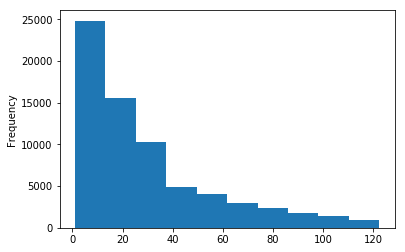

In [21]:
# Viagens em minutos
tripduration = mesma_estac['tripInMinutes']
tripduration[tripduration < tripduration.quantile(.95)].plot(kind='hist')

# Distribuição agrupada por CUSTOMER vs SUBSCRIBER
### Passeios com mais de 30 minutos são mais caros, então veremos a distribuição com menos de 30 minutos.

usertype
Customer      AxesSubplot(0.125,0.125;0.775x0.755)
Subscriber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tripInMinutes, dtype: object

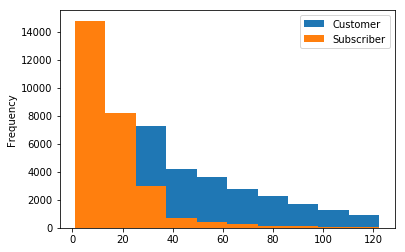

In [22]:

mesma_estac[tripduration < tripduration.quantile(.95)] \
  .groupby('usertype')['tripInMinutes'].plot(kind='hist', stacked=True, legend=True)

In [ ]:
# Verificando a versão do Python
from platform import python_version
print (python_version()) 